In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import scipy
import time
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

In [5]:
# def linearODE(t, y, alpha):
#     yp = np.ones_like(y)
#     yp[0] = -alpha*y + np.exp(-t)
#     return yp

#OAH
def linearODE(t, y, alpha):
    yp = np.ones_like(y)
    yp[0] = y[1]
    yp[1] = -2*alpha*y[1] - y[0]
    return yp
y0 = [1, 0.5]

# VDP linear
# def linearODE(t, y, alpha):
#     yp = np.ones_like(y)
#     yp[0] = y[1]
#     yp[1] = alpha*y[1] - y[0]
#     return yp
# y0 = [2., 0.]

# exemple 1
# def linearODE(t, y, alpha):
#     yp = np.ones_like(y)
#     yp[0] = -2*y[0] + y[1] + 2*np.sin(t)
#     yp[1] = (alpha-1)*y[0] - alpha*y[1] + alpha*(np.cos(t) - np.sin(t))
#     return yp

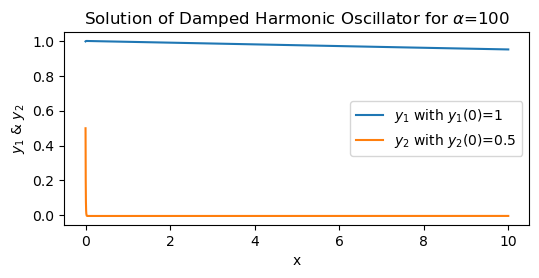

In [49]:
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Assuming you have defined linearODE and y0 before this

# Set a custom figure size (width, height) in inches
fig, ax = plt.subplots(figsize=(6, 2.5))

sol = solve_ivp(lambda t, y: linearODE(t, y, 100), t_span=[0, 10], y0=y0, method="RK45")
ax.plot(sol.t, sol.y[0, :], label=rf"$y_1$ with $y_1$(0)={y0[0]}")
ax.plot(sol.t, sol.y[1, :], label=rf"$y_2$ with $y_2$(0)={y0[1]}")
ax.set_xlabel("x")
ax.set_ylabel(r"$y_1$ & $y_2$")
ax.set_title(rf"Solution of Damped Harmonic Oscillator for $\alpha$=100")
ax.legend()

# Display the plot
plt.show()


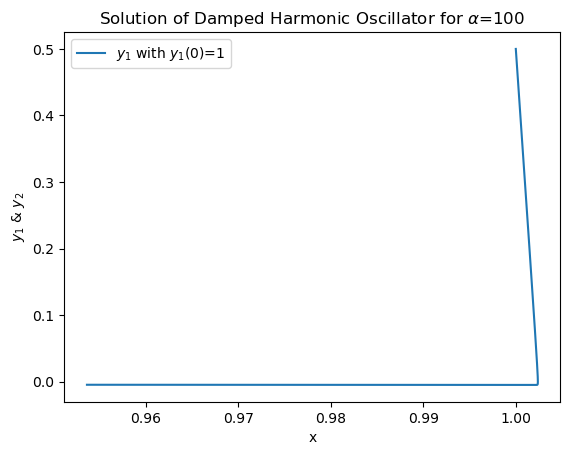

In [40]:
plt.plot(sol.y[0, :], sol.y[1, :], label=rf"$y_1$ with $y_1$(0)={y0[0]}")
plt.xlabel("x")
plt.ylabel(r"$y_1$ & $y_2$")
plt.title(rf"Solution of Damped Harmonic Oscillator for $\alpha$=100")
plt.legend()

100%|██████████| 9/9 [00:00<00:00, 58.10it/s]


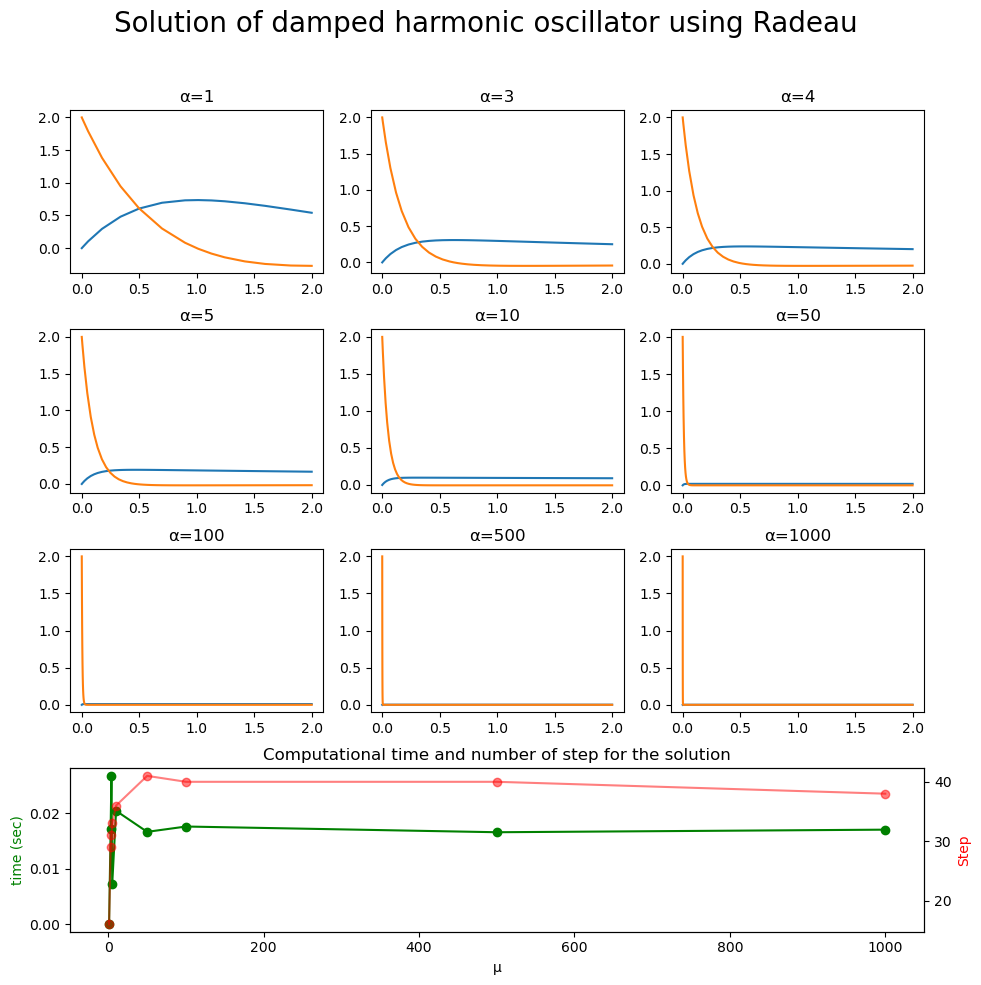

In [10]:
import matplotlib.gridspec as gridspec
alpha_list =  [1, 3, 4, 5, 10, 50, 100, 500, 1000]
fig, ax = plt.subplots(4, 3, figsize=(10, 10))
gs = gridspec.GridSpec(4, 3, width_ratios=[1, 1, 3])
ax_all = plt.subplot(gs[3, :])

computational_time = []
nb_step = []
for i, alpha in tqdm(enumerate(alpha_list), total=len(alpha_list)):
    
    equation = scipy.integrate.Radau(lambda t, y: linearODE(t, y, alpha=alpha),
                                 t0 = 0,
                                 y0 = y0,
                                 t_bound = 2,
                                 rtol=0.0001,
                                 atol=1e-07
                                 )
    
    t_final = []
    y1_final = []
    y2_final = []
    start = time.time()
    while(True):
        t_final.append(equation.t)
        y1_final.append(equation.y[0])
        y2_final.append(equation.y[1])
        if equation.status == 'finished':
            break
        if equation.status == 'failed':
            break
        equation.step()
    end = time.time()
    computational_time.append(end-start)
    nb_step.append(len(t_final))

    ax[i//3, i%3].plot(t_final, y1_final)
    ax[i//3, i%3].plot(t_final, y2_final)
    ax[i//3, i%3].set_title(f"α={alpha}")

ax_all.plot(alpha_list, computational_time, 'g-o')
ax_all.set_xlabel("μ")
ax_all.set_ylabel("time (sec)", color = "g")
ax_all.set_title("Computational time and number of step for the solution")

secax_y = ax_all.twinx()
secax_y.plot(alpha_list, nb_step, 'r-o', alpha=0.5)
secax_y.set_xlabel("μ")
secax_y.set_ylabel("Step", color = "r")

fig.suptitle(f"Solution of damped harmonic oscillator using Radeau", size=20)
fig.tight_layout()
fig.subplots_adjust(top=0.88)

100%|██████████| 9/9 [00:00<00:00, 17.49it/s]


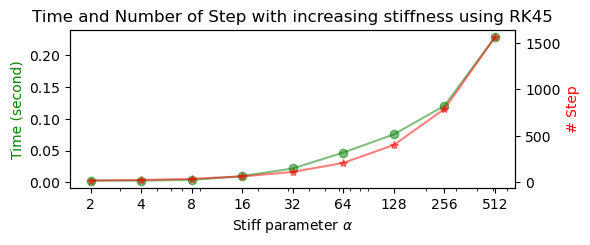

In [43]:
import matplotlib.gridspec as gridspec
alpha_list =   [2, 4, 8, 16, 32, 64, 128, 256, 512]
fig, ax_all = plt.subplots(1, figsize=(6, 2.5))

computational_time = []
nb_step = []
for i, alpha in tqdm(enumerate(alpha_list), total=len(alpha_list)):
    
    equation = scipy.integrate.RK45(lambda t, y: linearODE(t, y, alpha=alpha),
                                 t0 = 0,
                                 y0 = y0,
                                 t_bound = 5.,
                                 rtol=0.0001,
                                 atol=1e-07
                                 )
    t_final = []
    y1_final = []
    y2_final = []
    start = time.time()
    while(True):
        t_final.append(equation.t)
        y1_final.append(equation.y[0])
        y2_final.append(equation.y[1])
        if equation.status == 'finished':
            break
        if equation.status == 'failed':
            break
        equation.step()
    end = time.time()
    computational_time.append(end-start)
    nb_step.append(len(t_final))

ax_all.plot(alpha_list, computational_time, 'g-o', alpha=0.5)
ax_all.set_xlabel(r"Stiff parameter $\alpha$")
ax_all.set_ylabel("Time (second)", color = "g")
ax_all.set_title("Time and Number of Step with increasing stiffness using RK45")

secax_y = ax_all.twinx()
secax_y.plot(alpha_list, nb_step, 'r-*', alpha=0.5)
secax_y.set_xscale("log")
secax_y.set_xticks(alpha_list, labels=alpha_list)
secax_y.set_ylabel("# Step", color = "r")

fig.tight_layout()
fig.subplots_adjust(top=0.88)

In [48]:
ax_all.get_xticks()

array([  2,   4,   8,  16,  32,  64, 128, 256, 512])

100%|██████████| 9/9 [00:01<00:00,  8.17it/s]


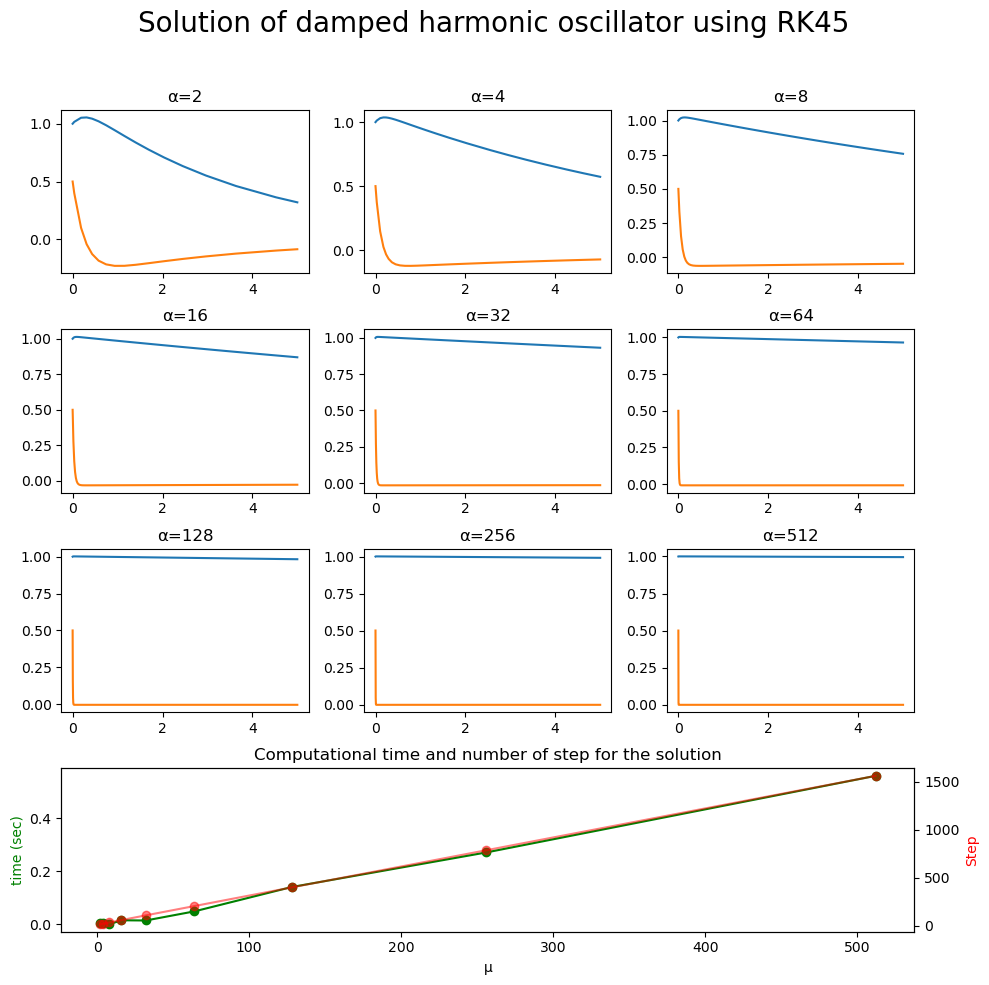

In [10]:
import matplotlib.gridspec as gridspec
alpha_list =   [2, 4, 8, 16, 32, 64, 128, 256, 512]
fig, ax = plt.subplots(4, 3, figsize=(10, 10))
gs = gridspec.GridSpec(4, 3, width_ratios=[1, 1, 3])
ax_all = plt.subplot(gs[3, :])

computational_time = []
nb_step = []
for i, alpha in tqdm(enumerate(alpha_list), total=len(alpha_list)):
    
    equation = scipy.integrate.RK45(lambda t, y: linearODE(t, y, alpha=alpha),
                                 t0 = 0,
                                 y0 = y0,
                                 t_bound = 5.,
                                 rtol=0.0001,
                                 atol=1e-07
                                 )
    
    t_final = []
    y1_final = []
    y2_final = []
    start = time.time()
    while(True):
        t_final.append(equation.t)
        y1_final.append(equation.y[0])
        y2_final.append(equation.y[1])
        if equation.status == 'finished':
            break
        if equation.status == 'failed':
            break
        equation.step()
    end = time.time()
    computational_time.append(end-start)
    nb_step.append(len(t_final))

    ax[i//3, i%3].plot(t_final, y1_final)
    ax[i//3, i%3].plot(t_final, y2_final)
    ax[i//3, i%3].set_title(f"α={alpha}")

ax_all.plot(alpha_list, computational_time, 'g-o')
ax_all.set_xlabel("μ")
ax_all.set_ylabel("time (sec)", color = "g")
ax_all.set_title("Computational time and number of step for the solution")

secax_y = ax_all.twinx()
secax_y.plot(alpha_list, nb_step, 'r-o', alpha=0.5)
secax_y.set_xlabel("μ")
#secax_y.set_xscale("log")
secax_y.set_ylabel("Step", color = "r")

fig.suptitle(f"Solution of damped harmonic oscillator using RK45", size=20)
fig.tight_layout()
fig.subplots_adjust(top=0.88)

In [43]:
equation = scipy.integrate.RK45(lambda t, y: linearODE(t, y, alpha=200),
                                t0 = 0,
                                y0 = [1, 0.5],
                                t_bound = 100,
                                rtol=0.0001,
                                atol=1e-07
                                )

t_final = []
y1_final = []
y2_final = []
while(True):
    t_final.append(equation.t)
    y1_final.append(equation.y[0])
    y2_final.append(equation.y[1])
    if equation.status == 'finished':
        break
    if equation.status == 'failed':
        break
    equation.step()

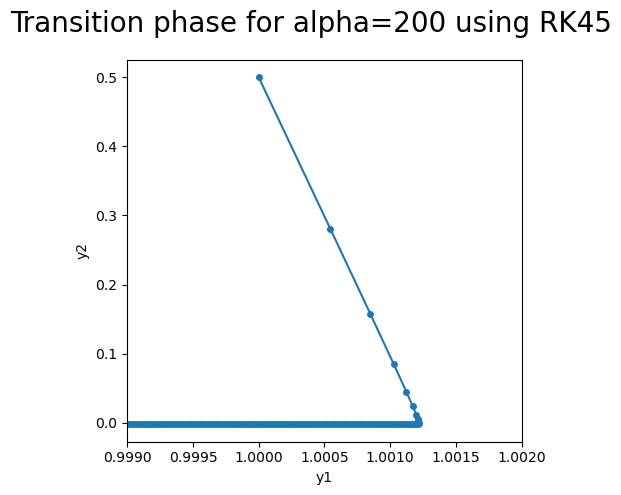

In [51]:
fig, ax = plt.subplots(1, figsize=(5, 5))
ax.plot(y1_final, y2_final, "-o", markersize=4)

ax.set_xlabel("y1")
ax.set_ylabel("y2")
ax.set_xlim([0.999,1.002])

fig.suptitle(f"Transition phase for alpha={200} using RK45", size=20)
fig.tight_layout()
fig.subplots_adjust(top=0.88)

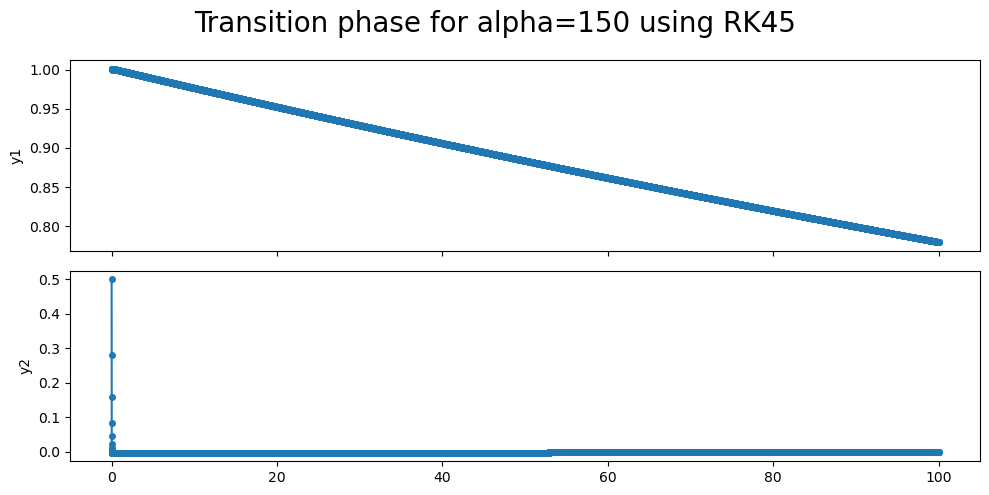

In [53]:
fig, ax = plt.subplots(2, figsize=(10, 5), sharex=True)
ax[0].plot(t_final, y1_final, "-o", markersize=4)
ax[1].plot(t_final, y2_final, "-o", markersize=4)

ax[0].set_ylabel("y1")
ax[1].set_ylabel("y2")

fig.suptitle(f"Transition phase for alpha={150} using RK45", size=20)
fig.tight_layout()
fig.subplots_adjust(top=0.88)